# Principal Component Analysis

- Lab Assignment 5

Demonstrate PCA for
1. Visualization of data (Using Iris and Glass Dataset). Demonstrate the working of PCA by giving number of components and expected variance as input.
2. Dimensionality reduction for images (Digits dataset (mnist) with 784 features and optdigit with 64 features). Demonstrate scree graph to identify optimal number of features.


Principal component analysis, or PCA, is a statistical procedure that `allows you` to summarize the information content in `large data tables` by means of a smaller set of `“summary indices”` that can be more easily visualized and analyzed.

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

`So to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.`

`The attribute which describes the most variance is called the first principal component and is placed at the first coordinate.`
Similarly, the attribute which stands second in describing variance is called a second principal component and so on. In short, the complete dataset can be expressed in terms of principal components. Usually, more than 90% of the variance is explained by two/three principal components.
Principal component analysis, or PCA, thus converts data from high dimensional space to low dimensional space by selecting the most important attributes that capture maximum information about the dataset.



## PCA for Data Visualization

For a lot of machine learning applications it helps to be able to visualize your data. Visualizing 2 or 3 dimensional data is not that challenging. However, even the Iris dataset used in this part of the tutorial is 4 dimensional. You can use PCA to reduce that 4 dimensional data into 2 or 3 dimensions so that you can plot and hopefully understand the data better.





# Load Iris Dataset



In [128]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
iris_df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [129]:
iris_df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Load Glass Dataset

In [130]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
glass_df = pd.read_csv(url,names=['Id','refractive_index','Sodium_Na','Magnesium','Aluminum','Silicon','Potassium','Calcium','Barium','Iron','Type_of_glass'])

In [131]:
glass_df.head()

,Id,refractive_index,Sodium_Na,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [132]:
glass_df['Type_of_glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

1. building_windows_float_processed
2. building_windows_non_float_processed
3. vehicle_windows_float_processed
4. vehicle_windows_non_float_processed (none in this database)
5. containers
6. tableware
7. headlamps

In [133]:
glass_df.isnull().sum()

Id                  0
refractive_index    0
Sodium_Na           0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type_of_glass       0
dtype: int64

In [134]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                214 non-null    int64  
 1   refractive_index  214 non-null    float64
 2   Sodium_Na         214 non-null    float64
 3   Magnesium         214 non-null    float64
 4   Aluminum          214 non-null    float64
 5   Silicon           214 non-null    float64
 6   Potassium         214 non-null    float64
 7   Calcium           214 non-null    float64
 8   Barium            214 non-null    float64
 9   Iron              214 non-null    float64
 10  Type_of_glass     214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [135]:
glass_df.columns

Index(['Id', 'refractive_index', 'Sodium_Na', 'Magnesium', 'Aluminum',
       'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron', 'Type_of_glass'],
      dtype='object')

In [136]:
glass_df.drop(['Id'],axis=1,inplace=True)

# EDA

In [156]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler

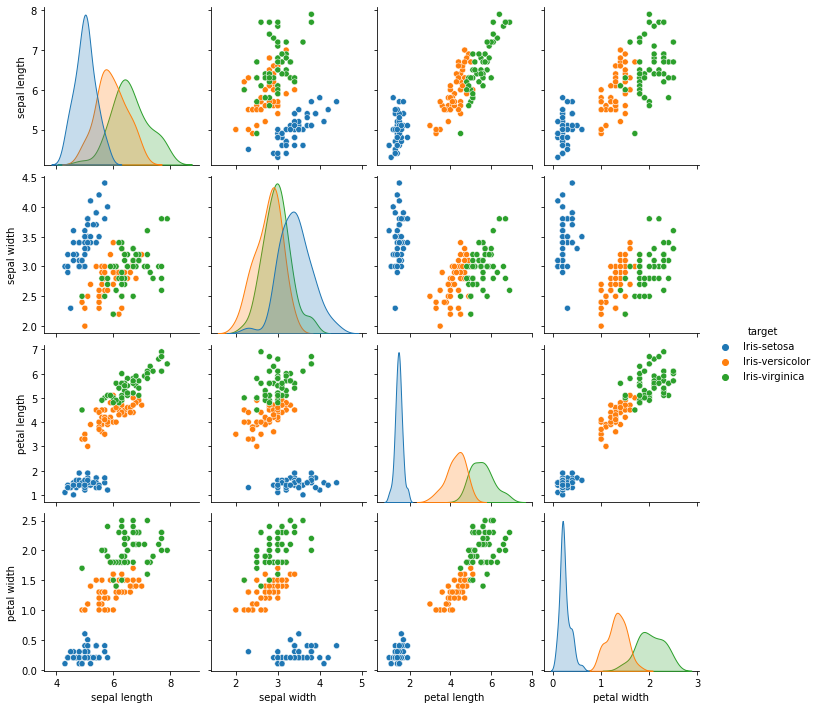

In [138]:
sns.pairplot(iris_df,hue='target')

Let's apply PCA before standarizing the data.

In [139]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

In [140]:
# Separating out the features
x = iris_df.loc[:, features].values
# Separating out the target
y = iris_df.loc[:,['target']].values

In [141]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [143]:
x[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

## PCA Projection to 2D
The original data has 4 columns (sepal length, sepal width, petal length, and petal width). In this section, the code projects the original data which is 4 dimensional into 2 dimensions. I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [144]:
from sklearn.decomposition import PCA

In [145]:
pca = PCA(n_components=2)

In [146]:
principalComponents = pca.fit_transform(x)

In [147]:
principalComponents[:5]

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ]])

In [148]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [149]:
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [150]:
finalDf = pd.concat([principalDf, iris_df[['target']]], axis = 1)

In [151]:
finalDf.head(5)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


# Visualize 2D Projection

In [152]:
import matplotlib.pyplot as plt

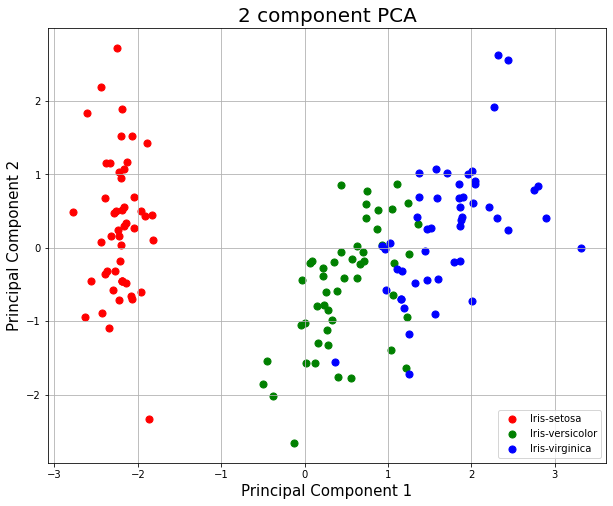

In [153]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Explained Variance

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.7% of the variance and the second principal component contains 23.0% of the variance. Together, the two components contain 95.7% of the information.

In [154]:
print(pca.explained_variance_ratio_)

[0.72770452 0.23030523]


## Check Components
The principal.components_ provides an array in which the number of rows tells the number of principal components while the number of columns is equal to the number of features in actual data.  We can easily see that there are tow rows as n_components was chosen to be 2. However, each row has 4 columns as in actual data.

In [155]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

Let's give n_components = 3.

In [157]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = iris_df.loc[:, features].values
# Separating out the target
y = iris_df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)


principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
finalDf = pd.concat([principalDf, iris_df[['target']]], axis = 1)

In [158]:
finalDf.head()

,principal component 1,principal component 2,principal component 3,target
0,-2.264542,0.505704,-0.121943,Iris-setosa
1,-2.086426,-0.655405,-0.227251,Iris-setosa
2,-2.367950,-0.318477,0.051480,Iris-setosa
3,-2.304197,-0.575368,0.098860,Iris-setosa
4,-2.388777,0.674767,0.021428,Iris-setosa


In [167]:
x = finalDf['target'].astype('category')
df = pd.DataFrame(x)

In [168]:
df.columns=['target']

In [169]:
df.head()

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [170]:
category_columns = df.select_dtypes(['category']).columns

In [171]:
category_columns

Index(['target'], dtype='object')

In [172]:
df[category_columns] = df[category_columns].apply(lambda x: x.cat.codes)

In [173]:
df.head()

,target
0,0
1,0
2,0
3,0
4,0


Text(0.5, 0, 'PC3')

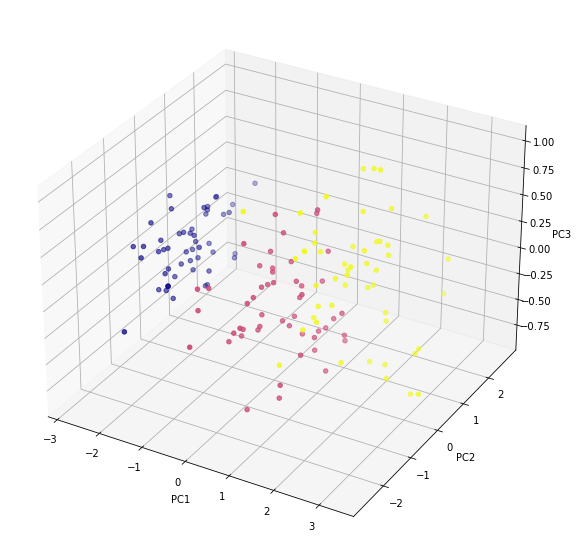

In [174]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(principalComponents[:,0],principalComponents[:,1],principalComponents[:,2],c=df['target'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

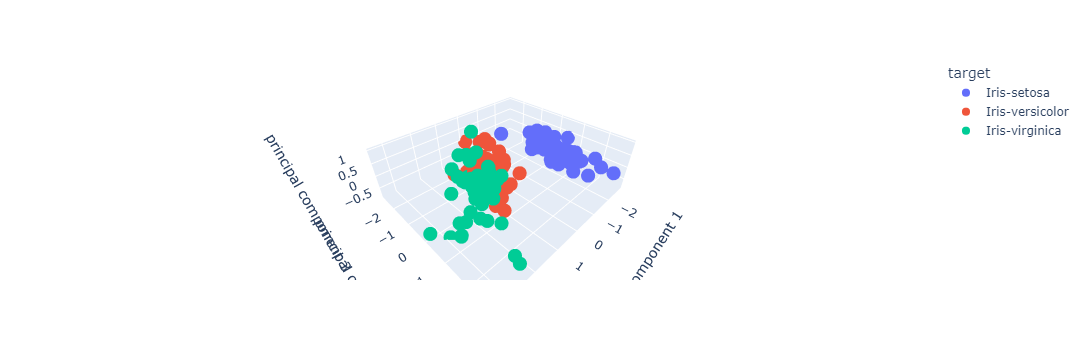

In [175]:
import plotly.express as px

fig = px.scatter_3d(finalDf, x='principal component 1', y='principal component 2', z='principal component 3',
              color='target')
fig.show()

Let's do the same for the glass dataset.

In [176]:
glass_df.columns

Index(['refractive_index', 'Sodium_Na', 'Magnesium', 'Aluminum', 'Silicon',
       'Potassium', 'Calcium', 'Barium', 'Iron', 'Type_of_glass'],
      dtype='object')

In [177]:
len(glass_df.columns)

10

In [178]:
features = ['refractive_index', 'Sodium_Na', 'Magnesium', 'Aluminum', 'Silicon',
       'Potassium', 'Calcium', 'Barium', 'Iron']

In [179]:
# Separating out the features
x = glass_df.loc[:, features].values
# Separating out the target
y = glass_df.loc[:,['Type_of_glass']].values

In [180]:
x[:5]

array([[1.52101e+00, 1.36400e+01, 4.49000e+00, 1.10000e+00, 7.17800e+01,
        6.00000e-02, 8.75000e+00, 0.00000e+00, 0.00000e+00],
       [1.51761e+00, 1.38900e+01, 3.60000e+00, 1.36000e+00, 7.27300e+01,
        4.80000e-01, 7.83000e+00, 0.00000e+00, 0.00000e+00],
       [1.51618e+00, 1.35300e+01, 3.55000e+00, 1.54000e+00, 7.29900e+01,
        3.90000e-01, 7.78000e+00, 0.00000e+00, 0.00000e+00],
       [1.51766e+00, 1.32100e+01, 3.69000e+00, 1.29000e+00, 7.26100e+01,
        5.70000e-01, 8.22000e+00, 0.00000e+00, 0.00000e+00],
       [1.51742e+00, 1.32700e+01, 3.62000e+00, 1.24000e+00, 7.30800e+01,
        5.50000e-01, 8.07000e+00, 0.00000e+00, 0.00000e+00]])

In [181]:
y[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [182]:
# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [183]:
pca = PCA(n_components=2)
principalComponents = pca.fit(x)

In [184]:
principalComponents

PCA(n_components=2)

In [185]:
x=principalComponents.transform(x)

In [186]:
x.shape

(214, 2)

In [187]:
principalDf = pd.DataFrame(data = x
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, glass_df[['Type_of_glass']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Type_of_glass
0,1.151140,-0.529488,1
1,-0.574137,-0.759788,1
2,-0.940160,-0.929836,1
3,-0.142083,-0.961677,1
4,-0.351092,-1.091249,1


## Check Components
The principal.components_ provides an array in which the number of rows tells the number of principal components while the number of columns is equal to the number of features in actual data.  We can easily see that there are tow rows as n_components was chosen to be 2. However, each row has 9 columns as in actual data.

In [188]:
principalComponents.components_

array([[ 0.54517662, -0.2581256 ,  0.11088095, -0.42870863, -0.22883635,
        -0.21934405,  0.49230609, -0.25037512,  0.18584154],
       [ 0.28568318,  0.27035007, -0.59355826,  0.29521154, -0.15509891,
        -0.15397013,  0.3453798 ,  0.48470218, -0.06203879]])

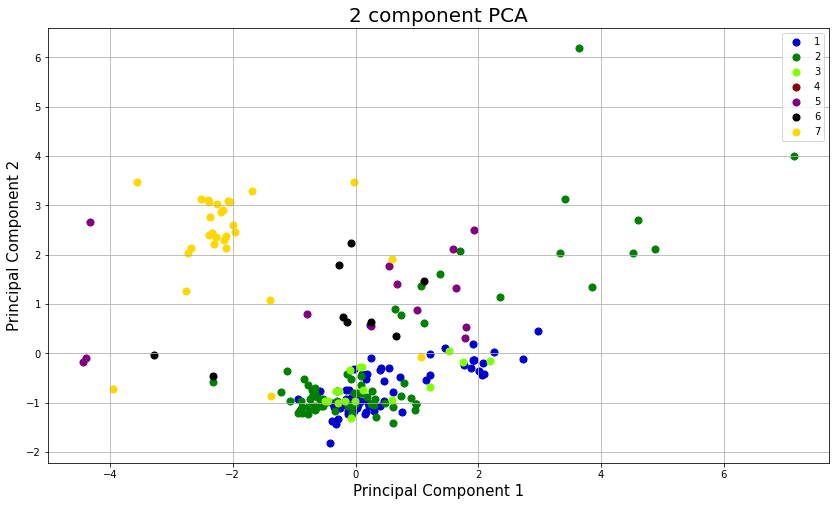

In [189]:
fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7]
colors = ['#0000CD', '#008000', '#7FFF00','#8B0000','#800080','000000','#FFD700']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Type_of_glass'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [190]:
pca.explained_variance_ratio_

array([0.27901819, 0.2277858 ])

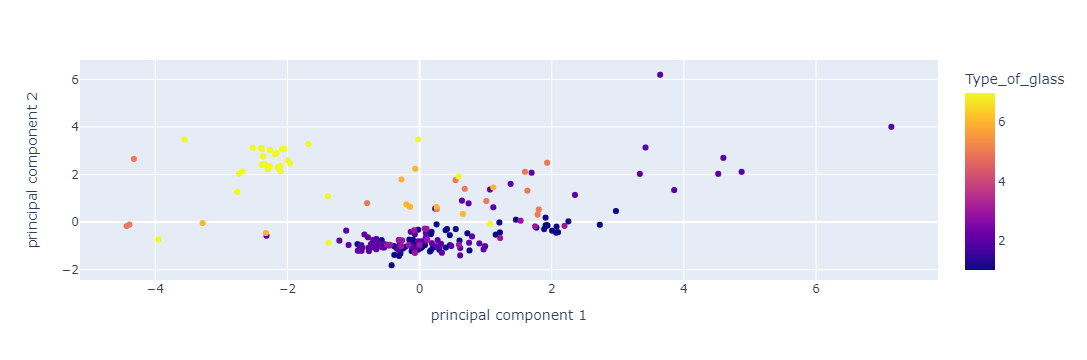

In [191]:
fig = px.scatter(finalDf, x='principal component 1', y='principal component 2',
              color='Type_of_glass')
fig.show()

In [192]:
# Separating out the features
x = glass_df.loc[:, features].values
# Separating out the target
y = glass_df.loc[:,['Type_of_glass']].values


# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)


principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
finalDf = pd.concat([principalDf, glass_df[['Type_of_glass']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,Type_of_glass
0,1.151140,-0.529488,-0.372096,1
1,-0.574137,-0.759788,-0.556708,1
2,-0.940160,-0.929836,-0.554907,1
3,-0.142083,-0.961677,-0.117125,1
4,-0.351092,-1.091249,-0.485079,1


Text(0.5, 0, 'PC3')

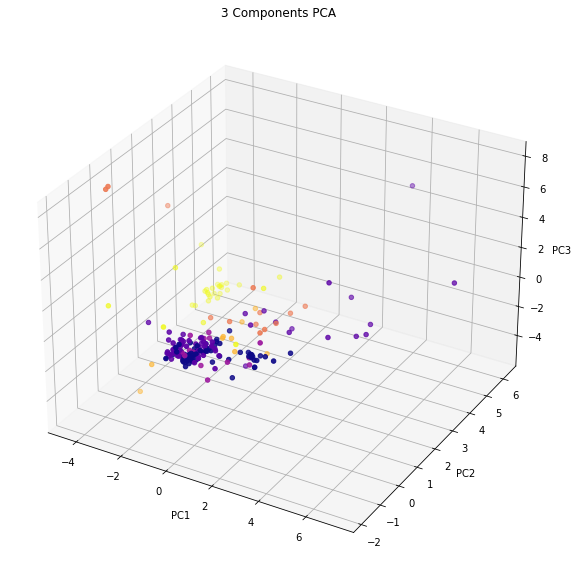

In [195]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(principalComponents[:,0],principalComponents[:,1],principalComponents[:,2], c=finalDf['Type_of_glass'],cmap='plasma')
axis.set_title('3 Components PCA')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

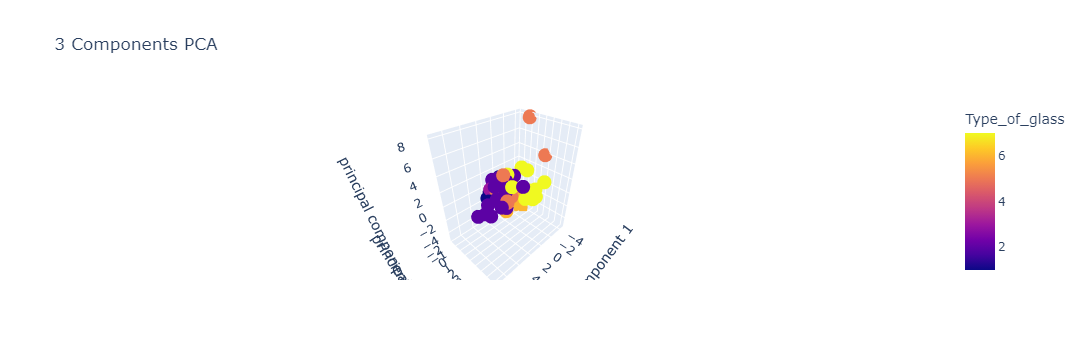

In [194]:
import plotly.express as px

fig = px.scatter_3d(finalDf, x='principal component 1', y='principal component 2', z='principal component 3',
              color='Type_of_glass',title="3 Components PCA")
fig.show()

### Calculate variance ratio

Explained_variance_ratio provides an idea of how much variation is explained by principal components. 

In [196]:
pca.explained_variance_ratio_

array([0.27901819, 0.2277858 , 0.15609378])

In [197]:
0.27901819+0.2277858+0.15609378

0.6628977699999999

## Second Part

`Dimensionality reduction for images (Digits dataset (mnist) with 784 features and optdigit with 64 features). Demonstrate scree graph to identify optimal number of features.`

## PCA to Speed-up Machine Learning Algorithms

While there are other ways to speed up machine learning algorithms, one less commonly known way is to use PCA. For this section, we aren’t using the IRIS dataset as the dataset only has 150 rows and only 4 feature columns. The MNIST database of handwritten digits is more suitable as it has 784 feature columns (784 dimensions), a training set of 60,000 examples, and a test set of 10,000 examples.

## Download and Load the Data

You can also add a `data_home` parameter to `fetch_mldata` to change where you download the data.

In [256]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

The images that you downloaded are contained in mnist.data and has a shape of (70000, 784) meaning there are 70,000 images with 784 dimensions (784 features).
The labels (the integers 0–9) are contained in mnist.target. The features are 784 dimensional (28 x 28 images) and the labels are simply numbers from 0–9.

In [257]:
x = mnist.data
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [258]:
y = mnist.target
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [259]:
type(y)

pandas.core.series.Series

In [260]:
df = x

In [261]:
df['target'] = y

In [262]:
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [263]:
features = x.columns
# Separating out the features
x = x.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values

In [264]:
x

array([[0.0, 0.0, 0.0, ..., 0.0, 0.0, '5'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, '0'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, '4'],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, '4'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, '5'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, '6']], dtype=object)

In [265]:
y

array([['5'],
       ['0'],
       ['4'],
       ...,
       ['4'],
       ['5'],
       ['6']], dtype=object)

In [266]:
# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)


principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [267]:
finalDf.head()

,principal component 1,principal component 2,target
0,-0.878403,-4.905233,5
1,8.906332,-7.389966,0
2,2.143395,10.002251,4
3,-6.417395,-4.301659,1
4,-5.376160,3.565767,9


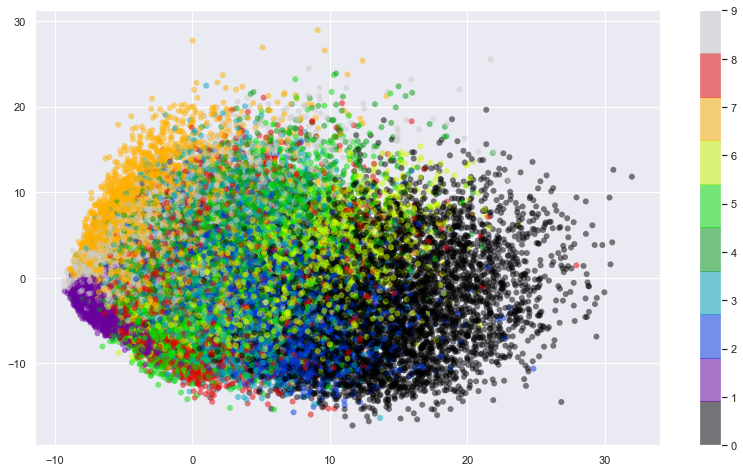

In [272]:
# Creating a scatter plot of the datapoints
plt.figure(figsize=(14,8))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

In [268]:
pca.explained_variance_

array([40.65367587, 29.12264647])

In [269]:
pca.explained_variance_ratio_

array([0.05646263, 0.04044754])

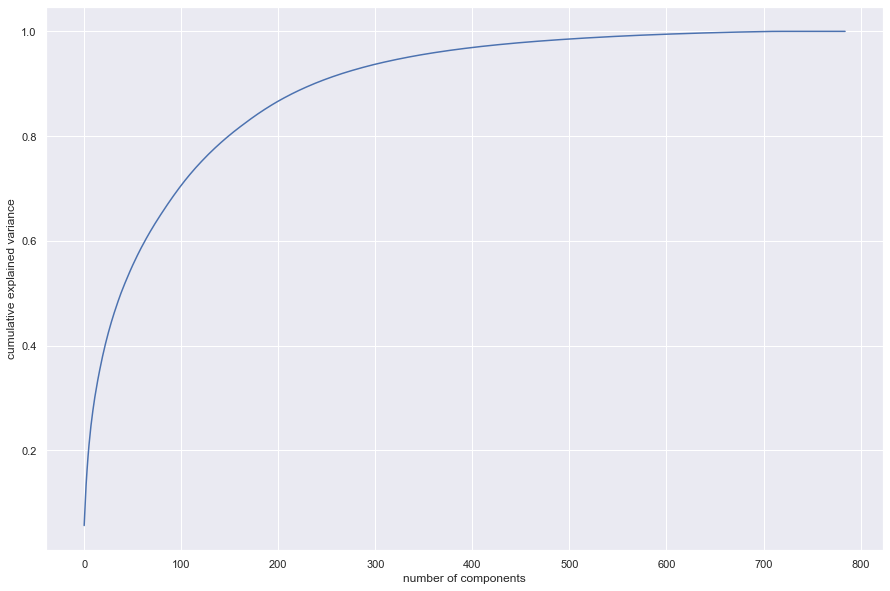

In [273]:
sns.set()
plt.figure(figsize=(15,10))
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [270]:
import numpy as np

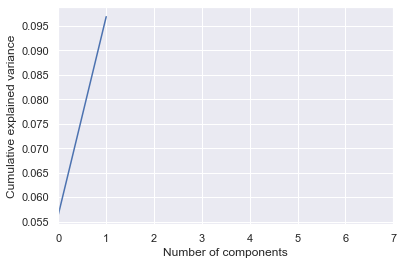

In [271]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [274]:
x = mnist.data
y = mnist.target
features = x.columns
# Separating out the features
x = x.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values

In [275]:
# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=300)

principalComponents = pca.fit_transform(x)


In [278]:
ddd = pca.explained_variance_ratio_

In [279]:
type(ddd)

numpy.ndarray

In [283]:
sum(ddd)*100

93.61080110155248

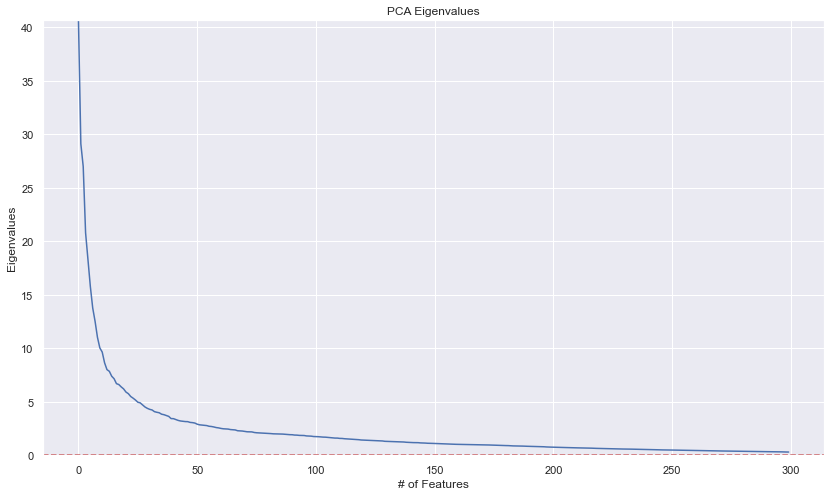

In [287]:
plt.figure(figsize=(14,8))
plt.ylabel('Eigenvalues')
plt.xlabel('# of Features')
plt.title('PCA Eigenvalues')
plt.ylim(0,max(pca.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=0,color='r',linestyle='--')
plt.plot(pca.explained_variance_)
plt.show()

## Digits datasets

In [229]:
from sklearn.datasets import load_digits

In [230]:
digits = load_digits()

In [232]:
x = digits.data
y = digits.target

In [234]:
len(x)

1797

In [235]:
len(y)

1797

In [236]:
pca = PCA(n_components=2)

In [237]:
xproj = pca.fit_transform(x)

In [239]:
x.shape

(1797, 64)

In [240]:
xproj.shape

(1797, 2)

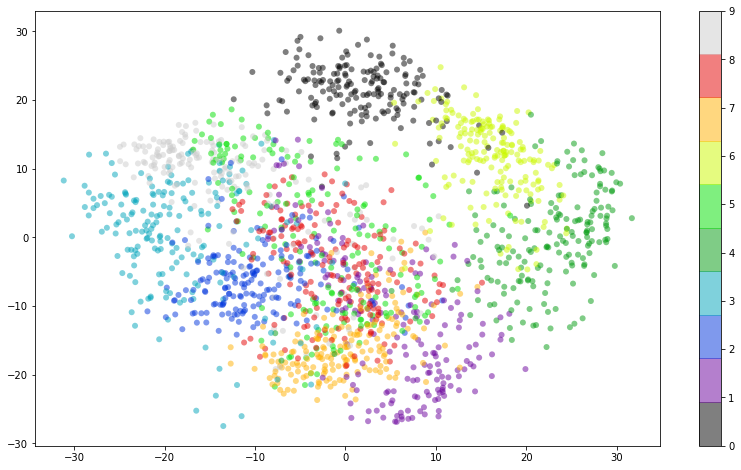

In [242]:
# Creating a scatter plot of the datapoints
plt.figure(figsize=(14,8))
plt.scatter(xproj[:, 0], xproj[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

## Choosing the Number of Components
But how much information have we thrown away? We can figure this out by looking at the explained variance as a function of the components:

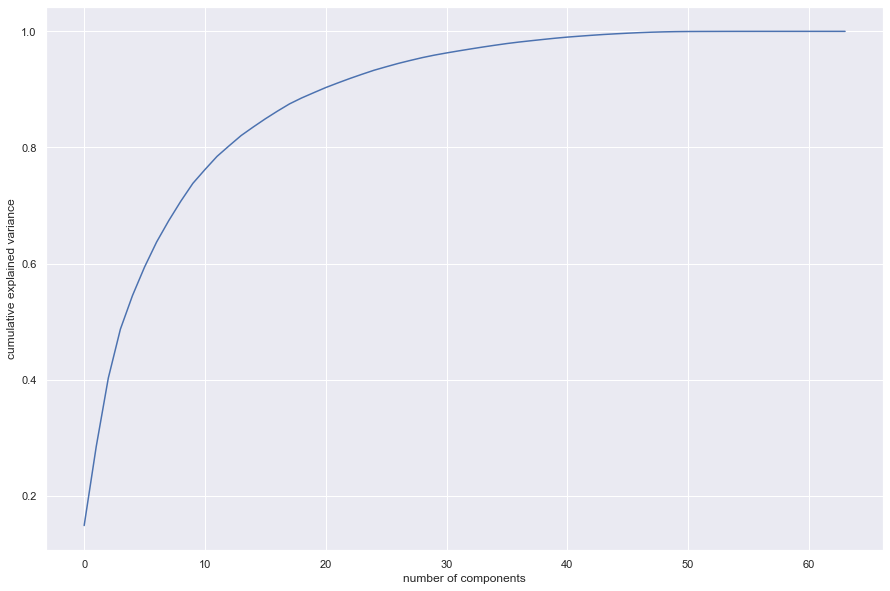

In [248]:
sns.set()
plt.figure(figsize=(15,10))
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

From the Scree plot, it can be seen that 20 components are required to explain 90% of the variance which is still better than computing using all the 64 features. The explained variance threshold can be choosen based on the doamin and business requirements.

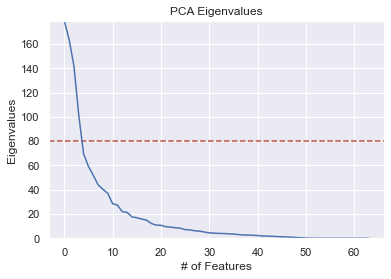

In [254]:
plt.ylabel('Eigenvalues')
plt.xlabel('# of Features')
plt.title('PCA Eigenvalues')
plt.ylim(0,max(pca.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80,color='r',linestyle='--')
plt.plot(pca.explained_variance_)
plt.show()

In [255]:
pca.explained_variance_

array([1.79006930e+02, 1.63717747e+02, 1.41788439e+02, 1.01100375e+02,
       6.95131656e+01, 5.91085249e+01, 5.18845391e+01, 4.40151067e+01,
       4.03109953e+01, 3.70117984e+01, 2.85190412e+01, 2.73211698e+01,
       2.19014881e+01, 2.13243565e+01, 1.76367222e+01, 1.69468639e+01,
       1.58513899e+01, 1.50044602e+01, 1.22344732e+01, 1.08868593e+01,
       1.06935663e+01, 9.58259779e+00, 9.22640260e+00, 8.69036872e+00,
       8.36561190e+00, 7.16577961e+00, 6.91973881e+00, 6.19295508e+00,
       5.88499123e+00, 5.15586690e+00, 4.49129656e+00, 4.24687799e+00,
       4.04743883e+00, 3.94340334e+00, 3.70647245e+00, 3.53165306e+00,
       3.08457409e+00, 2.73780002e+00, 2.67210896e+00, 2.54170563e+00,
       2.28298744e+00, 1.90724229e+00, 1.81716569e+00, 1.68996439e+00,
       1.40197220e+00, 1.29221888e+00, 1.15893419e+00, 9.31220008e-01,
       6.69850594e-01, 4.86065217e-01, 2.52350432e-01, 9.91527944e-02,
       6.31307848e-02, 6.07377581e-02, 3.96662297e-02, 1.49505636e-02,
      